# Titanic Data Analysis 

![Image](https://assets.editorial.aetnd.com/uploads/2012/04/sinking-of-the-titanic-gettyimages-542907919-1.jpg?width=800&height=400&crop=1&w=800&h=400&q=100)

## Objective:

The objective of this project is to find out the connection of certain things with the survival of the passengers aboard titanic, and how if any of the situations or conditions impacted the survival rates. 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

We will import the Titanic csv into our variable to perform analysis on it

In [54]:
titanic_df = pd.read_csv('Titanic.csv')

Displaying the dataset

In [4]:
titanic_df

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,S,Second,man,True,0
887,female,19.0,0,0,30.0000,S,First,woman,True,1
888,female,NaN,1,2,23.4500,S,Third,woman,False,0
889,male,26.0,0,0,30.0000,C,First,man,True,1


Displaying the the columns in our data set 

In [5]:
titanic_df.columns

Index(['sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who',
       'alone', 'survived'],
      dtype='object')

## Data Preparation & Cleaning

Viewing some basic information about the dataset

In [55]:
titanic_df.shape

(891, 10)

In [7]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       714 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   class     891 non-null    object 
 7   who       891 non-null    object 
 8   alone     891 non-null    bool   
 9   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 63.6+ KB


In [57]:
titanic_df.describe()

,age,sibsp,parch,fare,survived
count,714.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208,0.383838
std,14.526497,1.102743,0.806057,49.693429,0.486592
min,0.420000,0.000000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400,0.000000
50%,28.000000,0.000000,0.000000,14.454200,0.000000
75%,38.000000,1.000000,0.000000,31.000000,1.000000
max,80.000000,8.000000,6.000000,512.329200,1.000000


In [58]:
titanic_df['age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64

In [59]:
titanic_df.dropna(subset=['age'], inplace=True)

Counting number of people who were male or female on the ship 

In [60]:
titanic_df['sex'].value_counts()

male      453
female    261
Name: sex, dtype: int64

Counting number of people with the amount of siblings they had

In [61]:
titanic_df['sibsp'].value_counts()

0    471
1    183
2     25
4     18
3     12
5      5
Name: sibsp, dtype: int64

Counting people with parents or children aboard the titanic

In [62]:
titanic_df['parch'].value_counts()

0    521
1    110
2     68
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

Counting the values of fares people paid 

In [63]:
titanic_df['fare'].value_counts()

13.0000    41
26.0000    30
8.0500     29
10.5000    24
7.8958     23
           ..
6.2375      1
14.0000     1
9.4750      1
8.8500      1
10.5167     1
Name: fare, Length: 220, dtype: int64

Counting the points of embarking 

In [64]:
titanic_df['embarked'].value_counts()

S    554
C    130
Q     28
Name: embarked, dtype: int64

Couting the amount of people distributed amongst classes of passengers

In [65]:
titanic_df['class'].value_counts()

Third     355
First     186
Second    173
Name: class, dtype: int64

Counting the number of men, women and children on the ship 

In [66]:
titanic_df['who'].value_counts()

man      413
woman    218
child     83
Name: who, dtype: int64

Counting how many people were alone or with someone

In [67]:
titanic_df['alone'].value_counts()

True     404
False    310
Name: alone, dtype: int64

Counting how many people survived and died

In [68]:
titanic_df['survived'].value_counts()

0    424
1    290
Name: survived, dtype: int64

## Exploratory Analysis & Visualization 

### Now to see the ratio of the people who died in total and those who survived

Now to take visualize the percentage of people that survived and that who did not 

In [259]:
people_survive = titanic_df.loc[(titanic_df['survived'] == 1), 'survived']
people_died = titanic_df.loc[(titanic_df['survived'] == 0), 'survived']

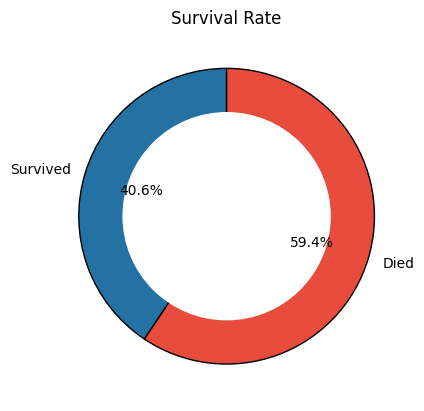

In [271]:
total_onboard = [people_survive.count(), people_died.count()]
labels = ['Survived' , 'Died']
fig, ax = plt.subplots()
color = ['#2471A3', '#E74C3C']
ax.pie(total_onboard, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'}, colors = color)
circle = plt.Circle((0, 0), 0.7, color='white')
ax.add_artist(circle)
ax.set_aspect('equal')
ax.set_title('Survival Rate')
plt.show()

It is evident from this that the amount of people that died was about 60% of the total travellers on the ship which is a total of 714 and only about 40% of that amount survived the wreckage.

### Travellers on Board

Let us see the percentage of the men , women and children who survived and those who did not

In [116]:
men_survive = titanic_df.loc[(titanic_df['who'] == 'man')& (titanic_df['survived'] == 1), 'who']
men_died = titanic_df.loc[(titanic_df['who'] == 'man')& (titanic_df['survived'] == 0), 'who']

In [98]:
women_survive = titanic_df.loc[(titanic_df['who'] == 'woman')& (titanic_df['survived'] == 1), 'who']
women_died = titanic_df.loc[(titanic_df['who'] == 'woman')& (titanic_df['survived'] == 0), 'who']

In [99]:
child_survive = titanic_df.loc[(titanic_df['who'] == 'child')& (titanic_df['survived'] == 1), 'who']
child_died = titanic_df.loc[(titanic_df['who'] == 'child')& (titanic_df['survived'] == 0), 'who']

In [112]:
total_pie = [men_survive.count(), men_died.count(), women_survive.count(), women_died.count(), child_survive.count(), child_died.count()]
pie = ['men survived', 'men died ', 'women survived ', 'women died ', 'child survived', 'child died']

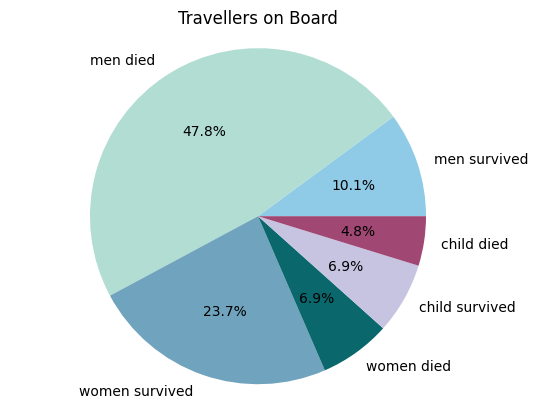

In [244]:
colors = ['#8fcae7', '#b1ddd3', '#70a3bd', '#0a676c', '#c6c4e1', '#a04873']
plt.pie(total_pie , labels=pie,colors = colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Travellers on Board')
plt.show()

The total occupants of the ship were 714 , out of which 413 were men , 213 women and 83 children. These are percentage of those who survived when Titanic sank and those that died.

### Class of Survivors and Deceased 

Now to see if there is any correlation between the survival of people and the class in which they were travelling on the titanic, we will make a bar graph to try and analyse any possible connections

In [119]:
class_a_survived = titanic_df.loc[(titanic_df['class'] == 'First') & (titanic_df['survived'] == 1), 'class']
class_b_survived = titanic_df.loc[(titanic_df['class'] == 'Second') & (titanic_df['survived'] == 1), 'class']
class_c_survived = titanic_df.loc[(titanic_df['class'] == 'Third') & (titanic_df['survived'] == 1), 'class']

In [120]:
class_a_died = titanic_df.loc[(titanic_df['class'] == 'First') & (titanic_df['survived'] == 0), 'class']
class_b_died = titanic_df.loc[(titanic_df['class'] == 'Second') & (titanic_df['survived'] == 0), 'class']
class_c_died = titanic_df.loc[(titanic_df['class'] == 'Third') & (titanic_df['survived'] == 0), 'class']

In [130]:
people_survived = [class_a_survived.shape[0], class_b_survived.shape[0], class_c_survived.shape[0]]
people_deceased = [class_a_died.shape[0], class_b_died.shape[0], class_c_died.shape[0]]

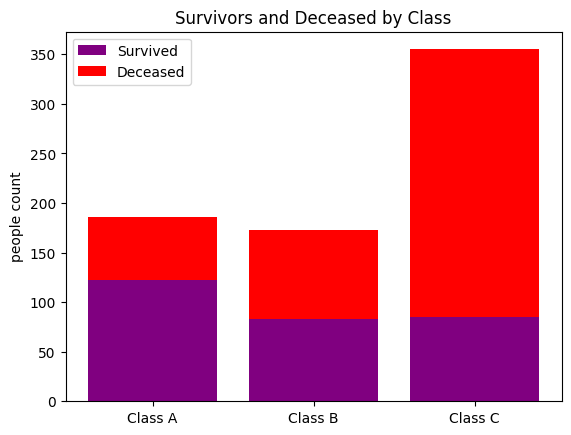

In [142]:
class_labels = ['Class A', 'Class B', 'Class C']
plt.bar(class_labels, people_survived, color='purple' , label='Survived')
plt.bar(class_labels, people_deceased, bottom=people_survived, color='red' , label='Deceased')
plt.ylabel('people count')
plt.title('Survivors and Deceased by Class')
plt.legend()
plt.show()

From this visualization, we can see clearly that compared to the other 2 classes , A had the highest number of survivors while class B had almost the similar amount of survivors as class C while being less than half in total travellers of class C. 
This stands to prove that the class of ticket a person bought largely affected their chance of surviving on the titanic .
It can also be understood that people from class C suffered the worst comparatively 

### Survivors based on their Age

Let us figure out how much age affected one's survival rate on the Titanic 

In [148]:
all_survivors = titanic_df.loc[(titanic_df['survived'] == 1)]

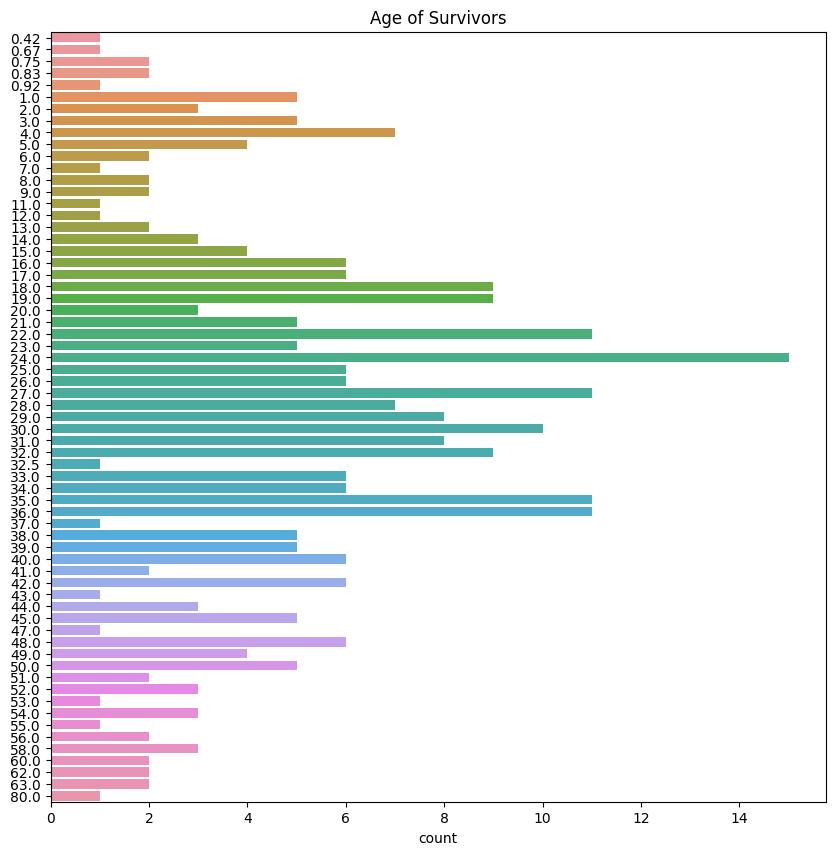

In [154]:
plt.figure(figsize=(10,10))
sns.countplot(y=all_survivors.age)
plt.title('Age of Survivors')
plt.ylabel(None);

We can see from this data that the majority of the survivors ranged from the ages of 16 to 36 .
We can also see that 24 years of age had the highest survival rate compared to all the other ages .

### Affect of embarking location of the fare paid

We will try to see if the location chosen by the people affected the amount they paid for the fare of Titanic

We first assign our variables the fare values of people by class who embarked from each of the 3 locations and then take out its range 

In [215]:
class_a_location_1 = titanic_df.loc[(titanic_df['class'] == 'First') & (titanic_df['embarked'] == 'S'), 'fare']
class_a_location_2 = titanic_df.loc[(titanic_df['class'] == 'First') & (titanic_df['embarked'] == 'C'), 'fare']
class_a_location_3 = titanic_df.loc[(titanic_df['class'] == 'First') & (titanic_df['embarked'] == 'Q'), 'fare']

In [160]:
class_b_location_1 = titanic_df.loc[(titanic_df['class'] == 'Second') & (titanic_df['embarked'] == 'S'), 'fare']
class_b_location_2 = titanic_df.loc[(titanic_df['class'] == 'Second') & (titanic_df['embarked'] == 'C'), 'fare']
class_b_location_3 = titanic_df.loc[(titanic_df['class'] == 'Second') & (titanic_df['embarked'] == 'Q'), 'fare']

In [161]:
class_c_location_1 = titanic_df.loc[(titanic_df['class'] == 'Third') & (titanic_df['embarked'] == 'S'), 'fare']
class_c_location_2 = titanic_df.loc[(titanic_df['class'] == 'Third') & (titanic_df['embarked'] == 'C'), 'fare']
class_c_location_3 = titanic_df.loc[(titanic_df['class'] == 'Third') & (titanic_df['embarked'] == 'Q'), 'fare']

In [171]:
class_a_range = [class_a_location_1.max(),class_a_location_2.max(), class_a_location_3.max()]
class_b_range = [class_b_location_1.max(),class_b_location_2.max(), class_b_location_3.max()]
class_c_range = [class_c_location_1.max(),class_c_location_2.max(), class_c_location_3.max()]

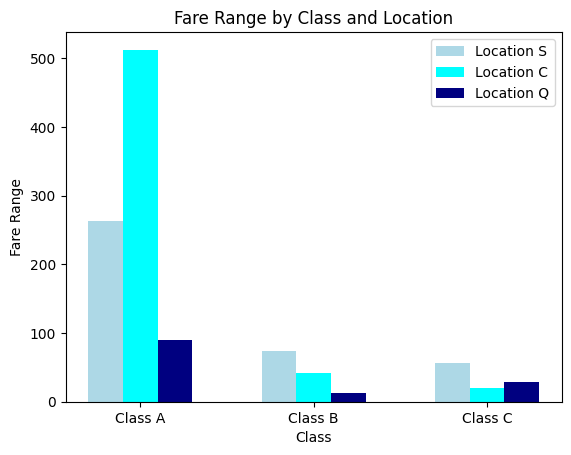

In [245]:
class_labels = ['Class A', 'Class B', 'Class C']

location_1_ranges = [class_a_range[0][1], class_b_range[0][1], class_c_range[0][1]]
location_2_ranges = [class_a_range[1][1], class_b_range[1][1], class_c_range[1][1]]
location_3_ranges = [class_a_range[2][1], class_b_range[2][1], class_c_range[2][1]]

locations = np.arange(len(class_labels))
bar_width = 0.2

plt.bar(locations, location_1_ranges, width=bar_width, color='lightblue', label='Location S')
plt.bar(locations + bar_width, location_2_ranges, width=bar_width, color = 'cyan', label='Location C')
plt.bar(locations + 2 * bar_width, location_3_ranges, width=bar_width,color='navy', label='Location Q')
plt.xlabel('Class')
plt.ylabel('Fare Range')
plt.title('Fare Range by Class and Location')

plt.xticks(locations + bar_width, class_labels)

plt.legend()

plt.show()


We can see from this that location S generally had the high range of fares for the passengers as no matter which class , people who boarded from S paid more compared to others .
There is an exception for class A only , as in this , people from location C had the highest variation in fares going as high as over 500. 

### The affect of family on the ship upon the survival of an individual

We will try to see if the having parents or children on the ship helped with the survival of individuals or had a negative impact

First to see the ratio of people who were with family and those who weren't we will make a pie graph 

In [216]:
people_survive_with = titanic_df.loc[(titanic_df['parch'] > 0)& (titanic_df['survived'] == 1), 'parch']
people_survive_without = titanic_df.loc[(titanic_df['parch'] < 1 )& (titanic_df['survived'] == 1), 'parch']
people_died_with = titanic_df.loc[(titanic_df['parch'] > 0)& (titanic_df['survived'] == 0), 'parch']
people_died_without = titanic_df.loc[(titanic_df['parch'] < 1 )& (titanic_df['survived'] == 0), 'parch']

In [224]:
total_people = [people_survive_with.count(), people_survive_without.count(), people_died_with.count(), people_died_without.count()]
pies = ['people survived having family', 'people survived not having family ', 'people died having family' , 'people died not having family']

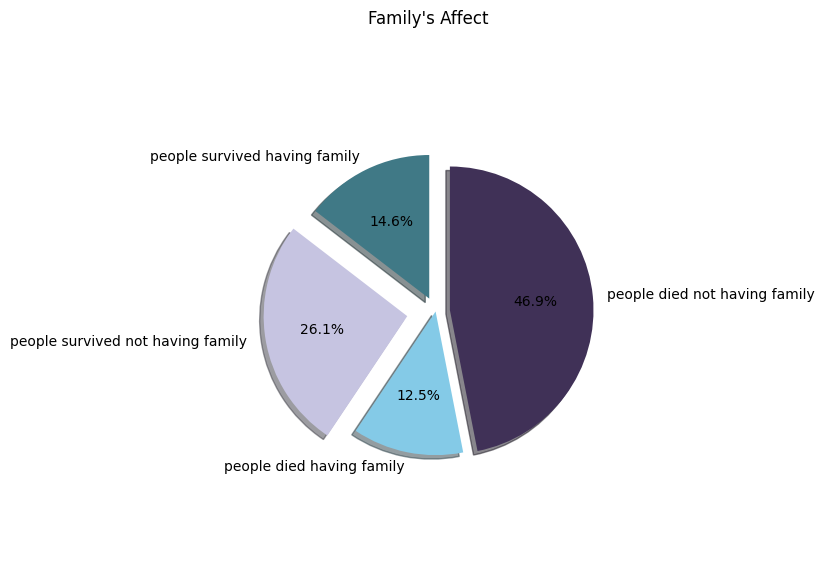

In [235]:
explode = (0.1, 0.2, 0.0, 0.1)
colors = ['#407986', '#c6c4e1', '#84cae7', '#403157']
fig , axis = plt.subplots(figsize=(8,6))
axis.pie(total_people, explode=explode, labels=pies, autopct='%1.1f%%', colors = colors , shadow=True, startangle=90)
axis.axis('equal') 
axis.set_title("Family's Affect")
plt.tight_layout()
plt.show()

We can see that the amount of people having died who had no family on the ship is almost 4 times as much as those who died who were accompanied by their family , someone to remember them and make sure that they were accounted for on the life boats.
Though we can also see that as there were more people who had no family on the ship , they were also the ones who survived more compared to people having family . We can deduce from this that many people could not afford this trip with family so most were stand alone voyagers .

### Amount of people from each embarking spot

We will visualize the data of the people who embarked from a certain spot 

In [246]:
people_location_1 = titanic_df.loc[(titanic_df['embarked'] == 'S'), 'embarked']
people_location_2 = titanic_df.loc[(titanic_df['embarked'] == 'C'), 'embarked']
people_location_3 = titanic_df.loc[(titanic_df['embarked'] == 'Q'), 'embarked']

In [247]:
locations = ['Location S', 'Location C', 'Location Q']
total_people = [people_location_1.count(), people_location_2.count(), people_location_3.count()]b

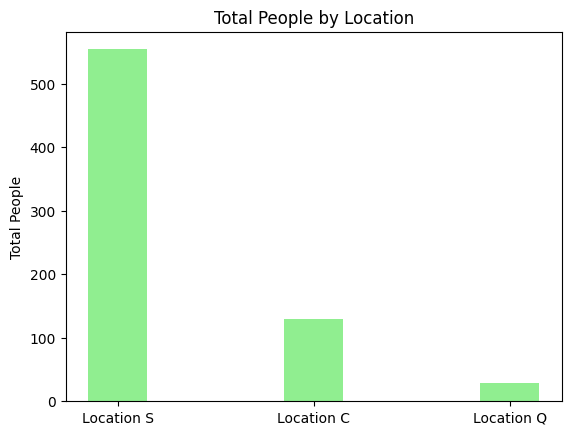

In [258]:
x_pos = np.arange(len(locations))
width = 0.3 
plt.bar(x_pos, total_people, width, align='center', color = 'lightgreen')
plt.ylabel('Total People')
plt.title('Total People by Location')
plt.xticks(x_pos, locations)
plt.show()

We can see from this that the majority of the people embarked from Location S , which is more that 500 out of 714.
People that embarked from Location C were just a little more than 100 and lastly from Location Q people that embarked are even less than 50.

### Survival of people based on their location of boarding

We will visualize the survival of the people based on the location they boarded the Titanic and if it has any correlation to their survival.

In [273]:
survived_location_1 = titanic_df.loc[(titanic_df['survived'] == 1) & (titanic_df['embarked'] == 'S'), 'fare']
survived_location_2 = titanic_df.loc[(titanic_df['survived'] == 1) & (titanic_df['embarked'] == 'C'), 'fare']
survived_location_3 = titanic_df.loc[(titanic_df['survived'] == 1) & (titanic_df['embarked'] == 'Q'), 'fare']

In [279]:
died_location_1 = titanic_df.loc[(titanic_df['survived'] == 0) & (titanic_df['embarked'] == 'S'), 'fare']
died_location_2 = titanic_df.loc[(titanic_df['survived'] == 0) & (titanic_df['embarked'] == 'C'), 'fare']
died_location_3 = titanic_df.loc[(titanic_df['survived'] == 0) & (titanic_df['embarked'] == 'Q'), 'fare']

In [275]:
survivors = [survived_location_1.shape[0], survived_location_2.shape[0], survived_location_3.shape[0]]
deceased = [died_location_1.shape[0], died_location_2.shape[0], died_location_3.shape[0]]

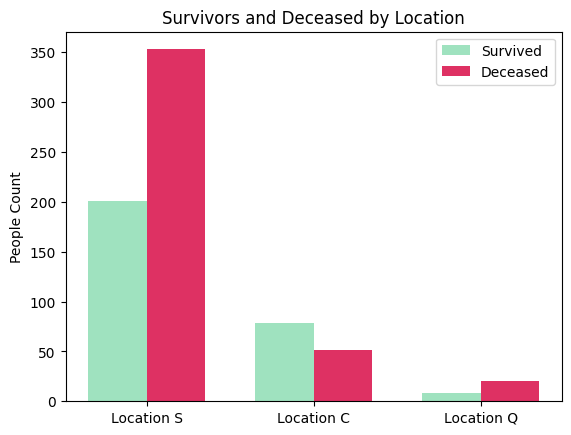

In [281]:
labels = ['Location S', 'Location C', 'Location Q']
x = np.arange(len(labels))
bar_width = 0.35
fig, ax = plt.subplots()
ax.bar(x - bar_width/2, survivors, bar_width, color='#9FE2BF', label='Survived')
ax.bar(x + bar_width/2, deceased, bar_width, color='#DE3163', label='Deceased')
ax.set_ylabel('People Count')
ax.set_title('Survivors and Deceased by Location')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

We can see from this that the majority of the deceased and survivors are from location S 

### Survival Based on Gender and Class

We will take a look at the possibility of survival of the people base on their gender and which class on the ship they were on and find out if there is any correlation between the three.

In [288]:
class_a_men_alive = titanic_df.loc[(titanic_df['class'] == 'First') & (titanic_df['sex'] == 'male') & (titanic_df['survived'] == 1) ,'sex']
class_b_men_alive = titanic_df.loc[(titanic_df['class'] == 'Second') & (titanic_df['sex'] == 'male') & (titanic_df['survived'] == 1) ,'sex']
class_c_men_alive = titanic_df.loc[(titanic_df['class'] == 'Third') & (titanic_df['sex'] == 'male') & (titanic_df['survived'] == 1) ,'sex']
class_a_men_dead = titanic_df.loc[(titanic_df['class'] == 'First') & (titanic_df['sex'] == 'male') & (titanic_df['survived'] == 0) ,'sex']
class_b_men_dead = titanic_df.loc[(titanic_df['class'] == 'Second') & (titanic_df['sex'] == 'male') & (titanic_df['survived'] == 0) ,'sex']
class_c_men_dead = titanic_df.loc[(titanic_df['class'] == 'Third') & (titanic_df['sex'] == 'male') & (titanic_df['survived'] == 0) ,'sex']

In [289]:
class_a_women_alive = titanic_df.loc[(titanic_df['class'] == 'First') & (titanic_df['sex'] == 'female') & (titanic_df['survived'] == 1) ,'sex']
class_b_women_alive = titanic_df.loc[(titanic_df['class'] == 'Second') & (titanic_df['sex'] == 'female') & (titanic_df['survived'] == 1) ,'sex']
class_c_women_alive = titanic_df.loc[(titanic_df['class'] == 'Third') & (titanic_df['sex'] == 'female') & (titanic_df['survived'] == 1) ,'sex']
class_a_women_dead = titanic_df.loc[(titanic_df['class'] == 'First') & (titanic_df['sex'] == 'female') & (titanic_df['survived'] == 0) ,'sex']
class_b_women_dead = titanic_df.loc[(titanic_df['class'] == 'Second') & (titanic_df['sex'] == 'female') & (titanic_df['survived'] == 0) ,'sex']
class_c_women_dead = titanic_df.loc[(titanic_df['class'] == 'Third') & (titanic_df['sex'] == 'female') & (titanic_df['survived'] == 0) ,'sex']

In [290]:
total_men_alive = [class_a_men_alive.count(),class_b_men_alive.count(),class_c_men_alive.count()]
total_men_dead = [class_a_men_dead.count(),class_b_men_dead.count(),class_c_men_dead.count()]
labels = ['Class A', 'Class B', 'Class C']
total_women_alive = [class_a_women_alive.count(),class_b_women_alive.count(),class_c_women_alive.count()]
total_women_dead = [class_a_women_dead.count(),class_b_women_dead.count(),class_c_women_dead.count()]

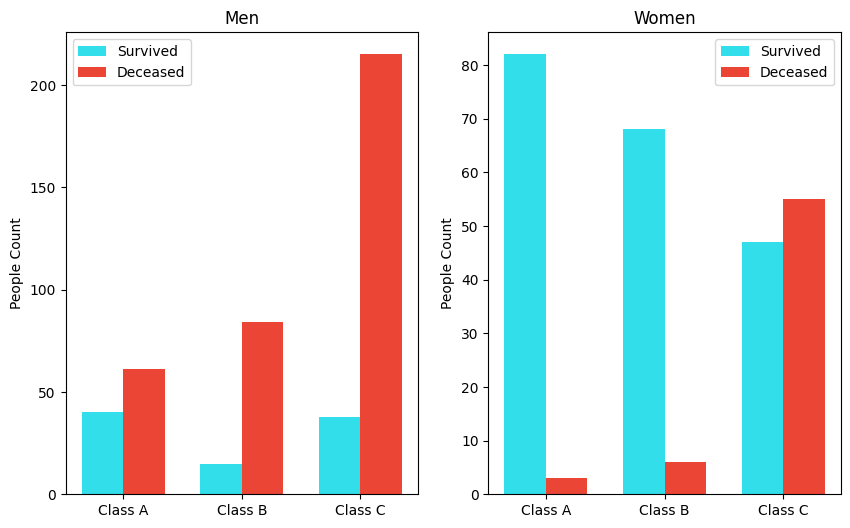

In [305]:
x = np.arange(len(labels))
bar_width = 0.35

fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].bar(x - bar_width/2, total_men_alive, bar_width, color='#32DEE9', label='Survived')
ax[0].bar(x + bar_width/2, total_men_dead, bar_width, color='#EA4535', label='Deceased')
ax[0].set_ylabel('People Count')
ax[0].set_title('Men')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].legend()

ax[1].bar(x - bar_width/2, total_women_alive, bar_width, color='#32DEE9', label='Survived')
ax[1].bar(x + bar_width/2, total_women_dead, bar_width, color='#EA4535', label='Deceased')
ax[1].set_ylabel('People Count')
ax[1].set_title('Women')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].legend()


plt.show()

There are a few this to notice here so we will check it one by one.

1) No matter the class , men always had more casualities than survivors . Men from class A survived the most amongst others and even though men from class C also survived almost as much , we must notice that the amount of people in class C was hugely more and has more than 200 casualities while neither class A or class B has more than 100 casualties each.
2) We can clearly see that the majority of women from class A and class B survived while having even less than 10 casualities each.
3) Women of class C is the only class where women had more casualities than survivors.
4) As we move lower in class , casualities for both men and women increased exponentially .

## Conclusion:

After assessing the data and checking some of the possible connections with survival there are a few things that came into view

1) There were more men on the titanic than women , but the majority of the survivors were women . Possibly because women and children were prioritized to be moved to the life boats.
2) It has also became clear that Classes did affect the survival of the passengers as class A had the highest survival rate and class C had the lowest . It can be possible that people from class A were offered more ameneties and were escorted to the life boats first given they were richer people comparatively.
3) The age of the people on board varied from a few months old baby to 80 year old senior citizens , but it is evident that survival chances from young people , ranging from 16 to 36 were the highest whereas th rest had comparatively less chances.
4) We also saw that the amount of people who died , 48% or so of them had no family on board , we can deduce from this that keeping track of your family and accounting for each member to reach the life boats was something that increased the rate of survival and those who had no one to do that for them sufferes due to that.
5) We have also seen that the majority of the passengers were taking on board from location S, while only a little amount of people got on board from location C and Q.
6) Lastly, we saw that women had a much higher chance of survival despite that class they were in ,whereas, men in class A had the highest chance of survival as their casualities increased steeply as the classes went down .

## References:

Titanic Dataset acquired from : https://www.kaggle.com/datasets/ibrahimelsayed182/titanic-dataset

Syntax and visualization ideas : https://jovian.com/learn/data-analysis-with-python-zero-to-pandas/lesson/lesson-5-data-visualization-with-matplotlib-and-seaborn